In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re

#Visualization
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

#Feature Engineering
import string
import re

from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

#Machine Learning Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout,Activation,Bidirectional
import tensorflow as tf

#Evaluation Metric
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(r"C:/Users/Nishi/Downloads/combined_data.csv")
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# Data Preprocessing

In [3]:
#Check for null values
print(df.isnull().sum())

label    0
text     0
dtype: int64


In [4]:
#Checking Shape of Dataset
df.shape

(83448, 2)

In [5]:
#Convert text to lower case
df['text'] = df['text'].str.lower()

In [6]:
#Remove Numbers and Special Character
#Often, characters, symbols, and numbers usually don't contribute to differentiating spam from legitimate emails.

def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))
df['text'] = df['text'].apply(remove_special_characters)

In [7]:
#Remove English stop-words

#Define stop-words in English
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

#Tokenize the text
df['text'] = df['text'].apply(word_tokenize)

#Remove stop words
df['text'] = df['text'].apply(remove_stop_words)

#Rejoin words for EDA
df['text'] = df['text'].apply(' '.join)

In [8]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
#Removal of hyperlinks

#Some emails contains URL which doesn't provide any valuable information.

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['text'] = df['text'].apply(remove_hyperlink)

# Exploratory Data Analysis

In [10]:
#Let check with an example of a spam text

for i in range (1,3):
    print("Email #"+str(i))
    spam_email = df[df['label'] == 1]['text'].iloc[i]
    print(spam_email+"\n")

Email #1
wulvob get medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt ever stopped wonder much average man pays mediecines ap painkillers drugs improve quality life weight reducing tablets many escapenumber whats worse mediucine costs lot branded rfwur intrested http dmvrwm remunerativ net dfuaeirxygiq visit website escapenumber

Email #2
university degree obtain prosperous future money earning power prestige comes career position youve always dreamed diploma prestigious non accredited unversities based present knowledge professional experience qualify required tests classes books examinations con

In [11]:
# Let check with an example of a legitimate text

for i in range (1,3):
    print("Email #"+str(i))
    legitimate_email = df[df['label'] == 0]['text'].iloc[i]
    print(legitimate_email+"\n")

Email #1
thanks answers guys know checked rsync manual would rather get escapenumber sure answer one current script bin bash rsync avt exclude alpha exclude arm exclude hppa exclude hurd exclude iaescapenumber exclude mescapenumberk exclude mips exclude mipsel exclude multi arch exclude powerpc exclude sescapenumber exclude sh exclude sparc exclude source ftp de debian org debian cd var www mirror debian cd know loads excludes include distros soon rsync manual del alias delete delete delete extraneous files dest dirs delete receiver deletes transfer default delete receiver deletes xfer delete receiver deletes transfer delete excluded also delete excluded files dest dirs delete would suggest use thanks john escapelong escapenumber escapenumber escapenumber olleg samoylov wrote jonathan escapelong wrote sorry banal question favourite keys escapenumber stage rsync rsync verbose recursive links hard links times filter r tmp delete delay updates source url destination log file olleg samoylo

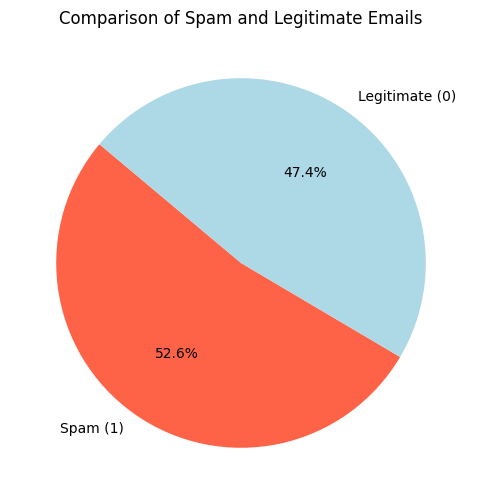

In [12]:
# Count the number of spam and legitimate emails
email_counts = df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(email_counts, labels=['Spam (1)', 'Legitimate (0)'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'lightblue'])
plt.title('Comparison of Spam and Legitimate Emails')
plt.show()

In [13]:
#Word Frequency Analysis

#Create a bar chart of the most frequent words in both spam and legitimate emails.

# Separate the spam and legitimate emails
spam_emails = df[df['label'] == 1]['text']
legit_emails = df[df['label'] == 0]['text']

# Count word frequencies for spam
spam_words = Counter()
spam_emails.apply(lambda x: spam_words.update(x.split()))

# Count word frequencies for legitimate emails
legit_words = Counter()
legit_emails.apply(lambda x: legit_words.update(x.split()))

# Get the most common words in spam and legitimate emails
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrame
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

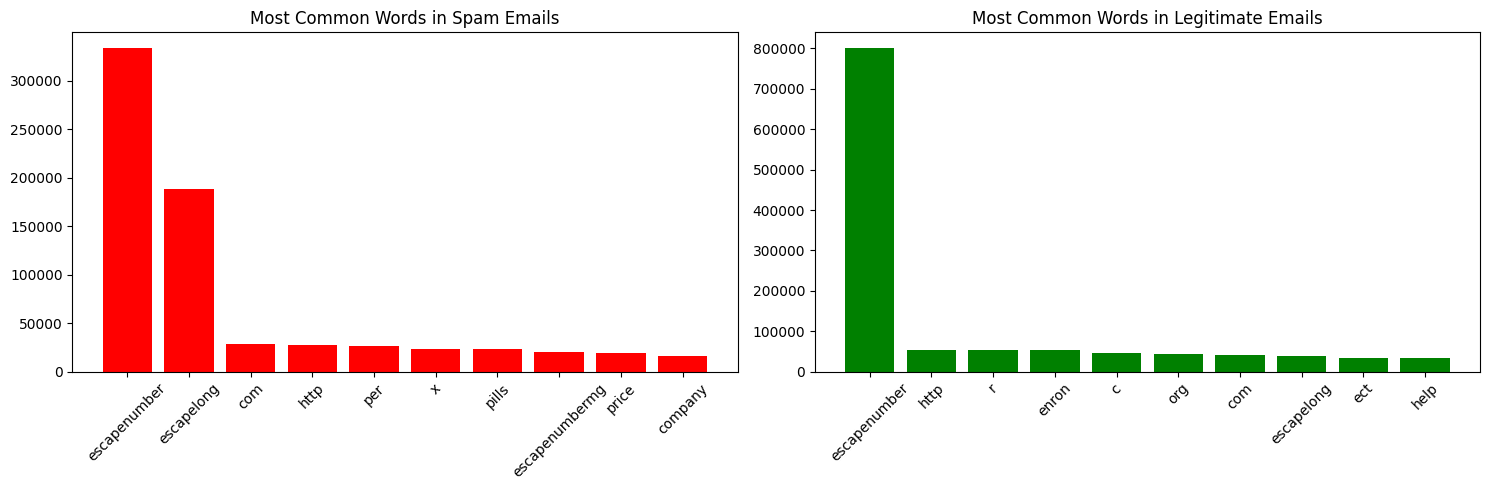

In [14]:
# Plotting the most common words in spam emails
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='red')
plt.title('Most Common Words in Spam Emails')
plt.xticks(rotation=45)

# Plotting the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='green')
plt.title('Most Common Words in Legitimate Emails')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

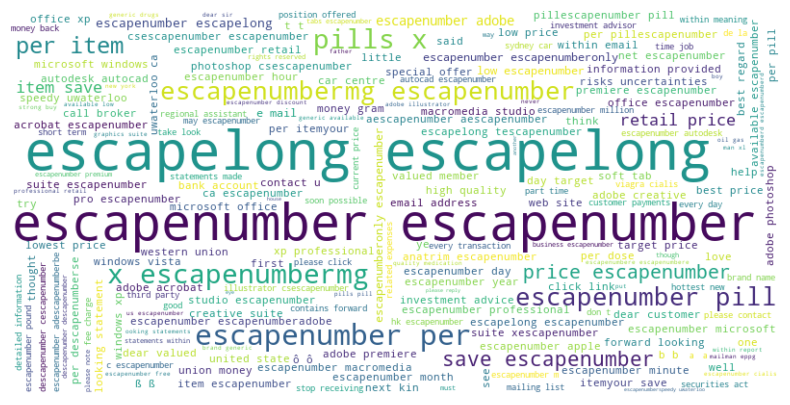

In [15]:
#Word Cloud

#Word clouds for spam and non-spam emails help visualize the most common words in each category.

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-gram Analysis

The purpose of n-gram analysis is to explore the most common sequences of two or three words in spam and legitimate emails. This could help in understanding common phrases used in both types of emails.

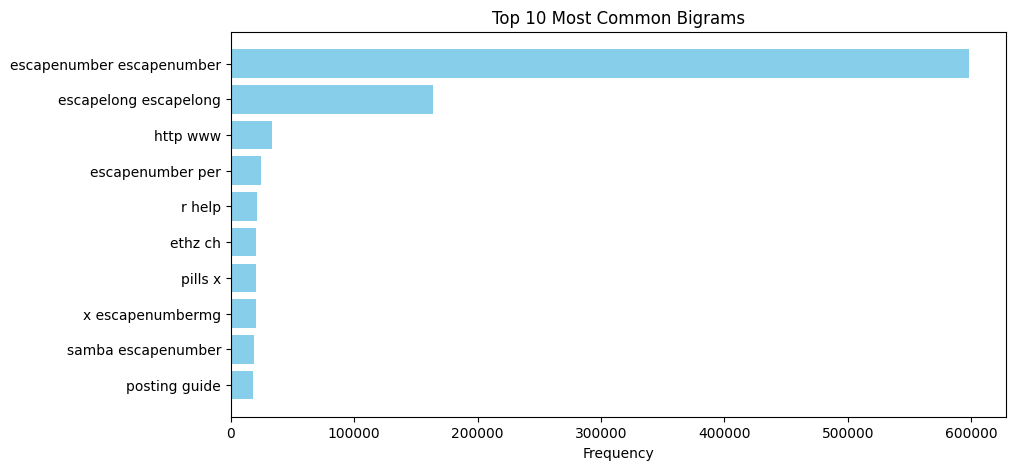

In [16]:
# Extract n-grams from text
def generate_ngrams(text, n=2):
    # Split the text into words
    words = text.split()
    # Ensure that there is no enough words
    if len(words) >= n:
        return [' '.join(grams) for grams in ngrams(words, n)]
    else:
        return []

# Convert bigrams
df['bigrams'] = df['text'].apply(lambda x: generate_ngrams(x, n=2))

# count the frequencies
bigram_counts = Counter([bigram for sublist in df['bigrams'] for bigram in sublist])

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)

# Convert to DataFrame for visualization
bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

# Plot the most common bigrams
plt.figure(figsize=(10, 5))
plt.barh(bigrams_df['Bigram'], bigrams_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  # Display the highest count at the top
plt.show()

# Feature Engineering¶
Spliting data into train and test set

In [17]:
# Split the data into features and target
X = df['text']  
y = df['label']  

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Tokenization

Tokenization is the process of splitting text into smaller chunks, called tokens. Each token is an input to the machine learning algorithm as a feature.

In Python, keras.preprocessing.text.Tokenizer is a utility function that help tokenizes a text into tokens while keeping only the words that frequently occur. After tokenizing the text, we often end up with a massive dictionary of words which won’t all be necessary. One solution for this problem is setting ‘max_features’ to select the top frequent words that we want to consider.

In [18]:
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding

Padding is the step of making all tokens for all emails to equal size. Since we send input in batches of data points, information might be lost when inputs are of different sizes. So, making them the same size help eases batch updates.

In [19]:
#Average Length
average_length = df['text'].apply(len).mean()
print("Average Length: "+str(average_length))

Average Length: 1305.4409692263446


In [20]:
max_length = 500 #Set to average length

# Padding sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Label the encoding target variable

The model expect the target variable as a number instead of string. Therefore, we can use a Label encoder to convert our target variable.

In [21]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model Selection
To simplify with an example, let say we analyze a movie, which consists of a sequence of scenes. When we watch a scene, we can't understand the movie at whole, but rather in connection with previous scenes. Text works in a similar way, a machine learning model has to understand the text by utilizing already-learned text (like a human neural network).

For those reasons, Recurrent neural network (RNN) is a perfect fit. It has a repeating module that takes input from the previous stage and gives its output as input to the next stage. One limit of RNNs is that we can only retain information from the most recent stage. To learn long-term dependencies, our network needs memorization power. Therfore, Long Short Term Memory Networks (LSTMs) works perfectly to solve this problem.

In short, LSTMs are a special case of RNNs, which have similar chain-like structure as RNNs, but with a different repeating module structure. In this model, we will use Bi-directional LSTM. In a Bi-directional LSTM, the input sequence is fed in two ways: one from past to future and one from future to past. This can provide additional context to the network and result in a fuller understanding of the data.

In [51]:
embedding_vector_length = 32
model = tf.keras.Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_length))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

C:\Users\Nishi\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
history = model.fit(X_train_padded, y_train_encoded, 
                    batch_size=512, 
                    epochs=15, 
                    validation_data=(X_test_padded, y_test_encoded))

Epoch 1/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1154s 10s/step - accuracy: 0.7706 - loss: 0.4366 - val_accuracy: 0.9718 - val_loss: 0.0827
Epoch 2/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1314s 11s/step - accuracy: 0.9799 - loss: 0.0670 - val_accuracy: 0.9813 - val_loss: 0.0625
Epoch 3/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1346s 12s/step - accuracy: 0.9777 - loss: 0.0766 - val_accuracy: 0.9824 - val_loss: 0.0630
Epoch 4/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1363s 12s/step - accuracy: 0.9873 - loss: 0.0457 - val_accuracy: 0.9530 - val_loss: 0.1268
Epoch 5/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1380s 12s/step - accuracy: 0.9792 - loss: 0.0636 - val_accuracy: 0.9819 - val_loss: 0.0606
Epoch 6/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1403s 12s/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9837 - val_loss: 0.0582
Epoch 7/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1419s 12s/step - accuracy: 0.9925 - loss: 0.0270 - val_accuracy: 0.9833 - val_loss: 0.0611
Epoch 8/15
115/115 ━━━━━━━━━━━━━━━━━━━━ 1422s 12s/step - accuracy: 0.9943 - loss: 0

# Handling Imbalance
Strategies for Handling Imbalance¶ To address the class imbalance issue, we will consider the following strategies:

Resampling Techniques a. Oversampling: We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.
b. Undersampling: We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [28]:
# We will use undersapling technique 
Safe_Email = df[df["label"]== 0]
Phishing_Email = df[df["label"]== 1]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [29]:
Safe_Email.shape,Phishing_Email.shape

((39538, 3), (43910, 3))

In [45]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,label,text,bigrams
0,0,computer connection cnn com wednesday escapenu...,"[computer connection, connection cnn, cnn com,..."
1,0,thanks answers guys know checked rsync manual ...,"[thanks answers, answers guys, guys know, know..."
2,0,larry king live escapenumber escapenumber p et...,"[larry king, king live, live escapenumber, esc..."
3,0,michael pobega wrote im sure mpl mozilla didnt...,"[michael pobega, pobega wrote, wrote im, im su..."
4,0,hi error tr sample escapenumber escapenumber e...,"[hi error, error tr, tr sample, sample escapen..."


In [46]:
# split the data into a metrix of features X and Dependent Variable y
X = Data['text']  
y = Data['label']  

In [47]:
# lets splitting Our Data 
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [48]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

In [49]:
#Train our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [35]:
# Prediction
y_pred = classifier.predict(x_test)

In [36]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [37]:
#accuracy_score
accuracy_score(y_test,y_pred)

0.9665268623926503

In [38]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11671,   241],
       [  597, 12526]], dtype=int64)

In [39]:
#classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97     11912\n           1       0.98      0.95      0.97     13123\n\n    accuracy                           0.97     25035\n   macro avg       0.97      0.97      0.97     25035\nweighted avg       0.97      0.97      0.97     25035\n'

# Build SVM Model

In [40]:
# Importing SVM
from sklearn.svm import SVC

#Create the Pipeline
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [41]:
# traing the SVM model 
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [42]:
# Prediction for SVM model
s_ypred = SVM.predict(x_test)

In [43]:
# check the SVM model accuracy
accuracy_score(y_test,s_ypred )

0.5483123626922308

# Model Performance
We experimented with two different machine learning models: the Random Forest Classifier and the Support Vector Machine (SVM). The performance of these models yielded contrasting results:

Random Forest Classifier:

Accuracy: 0.966
The Random Forest Classifier achieved impressive results with an accuracy of 0.931. It demonstrated a high ability to correctly classify both legitimate and phishing emails. The precision, recall, and F1-score provide additional insights into the model's performance on the various classes, which can be crucial for understanding the trade-offs involved.

Support Vector Machine (SVM):

Accuracy: 0.548
In contrast, the Support Vector Machine (SVM) exhibited significantly lower performance, with an accuracy of only 0.499. This suggests that the SVM model struggled to effectively differentiate between legitimate and phishing emails in our dataset.

# Model Interpretability
Understanding why the Random Forest Classifier outperformed the SVM is essential for further model improvement. Potential factors contributing to this difference include feature selection, model complexity, and hyperparameter tuning. A deeper dive into feature importance and the model's decision-making process can shed light on the critical features contributing to the model's high accuracy

# Future Work
While the Random Forest Classifier has shown promising results, there is room for improvement and further exploration:

Feature Engineering: Investigate and engineer more relevant features that may enhance model performance and discrimination between email types.

Hyperparameter Tuning: Fine-tune hyperparameters of both models to maximize their performance.

Ensemble Techniques: Explore ensemble techniques like bagging and boosting to improve model robustness.

Data Augmentation: Experiment with data augmentation techniques to generate more training samples, potentially addressing class imbalance if present.

Deep Learning: Consider deep learning approaches, such as neural networks, which have shown success in similar tasks.

Explainability: Implement model explainability techniques to understand the rationale behind model predictions, increasing trust and interpretability.

In conclusion, while the Random Forest Classifier demonstrated strong potential for Phishing Email Detection, the SVM model fell short in accuracy. This project serves as a starting point for more advanced investigations and enhancements in the ongoing effort to combat email phishing threats effectively..